# Regresión  y clasificación
### Parte 2:
## Autor:Wilgen Correa
### Fecha; 30-04-2021

## Construya una red neuronal de regresión para predecir el precio de las viviendas. Use los datos Boston Housing.  Los datos los puede encontrar en el enlace de Kaggle.


In [1]:
# Importar las librerias

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_boston


In [6]:

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
#print(boston_dataset.DESCR)

## <span style="color:blue">Lectura y documentación de los datos</span>

In [15]:
X = boston_dataset.data #Datos con que se entrena el modelo
Y = boston_dataset.target # Lo que se quiere predecir
#print()


n, p = X.shape # n numero de datos ejemplo que tenemos 
n, p # p Numero de caracteristicas que tenemos de cada dato
rm = X[:, 5]

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## <span style="color:blue">Análisis descriptivo estadístico</span>

Se realiza el análisis de la relación existente entre las variables de la muestra de información **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). 

- **¿Qué preguntas se quieren responder con estas herramientas?**

1. Primer cruce de info.

Aquí van los primeros códigos.

In [23]:
def relation_rm_medv(rm, means):
  plt.scatter(rm, means, alpha=0.25)
  plt.title("RM contra MEDV")
  plt.show()
  return np.corrcoef(rm, means)[0, 1]   #  se recibe uma matriz de correlaciones. Se extrae la correlación
  
def price_mean(rm, means):
  filtered_means = means[np.logical_and(rm > 5, rm < 6)]
  return np.mean(filtered_means) * 1000

def medv_hist(medv):
  plt.hist(medv, bins=500)
  plt.show()


## <span style="color:blue">1er. Análisis</span>
### <span style="color:blue">No. Habitaciones x Valor promedio vivienda - RM vs MEDV</span>


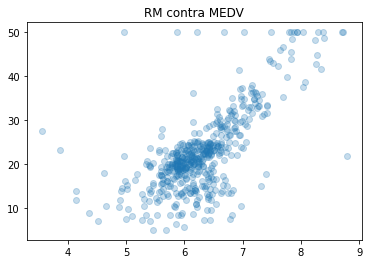

Correlacion entre RM(precio de vivienda) y MEDV(valor promedio) 0.695359947071539
la media de las viviendas que tiene 5 o 6 habitaciones es>  17551.5923566879


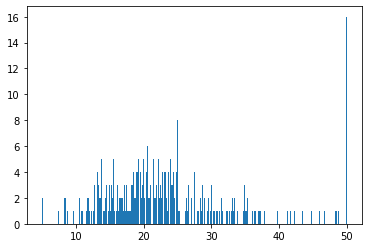

In [21]:
print("Correlacion entre RM(precio de vivienda) y MEDV(valor promedio)", relation_rm_medv(rm, Y))
print("la media de las viviendas que tiene 5 o 6 habitaciones es> ", price_mean(rm,Y))
medv_hist(Y)


## <span style="color:blue">1er. Análisis</span>
### <span style="color:blue">No. Habitaciones x Tasa de criminalidad - RM vs CRIM</span>


In [ ]:
print("Correlacion entre RM(precio de vivienda) y CRIM(valor promedio)", relation_rm_medv(rm, Y))
print("la media de las viviendas que tiene 5 o 6 habitaciones es> ", price_mean(rm,Y))
medv_hist(Y)


## <span style="color:blue">Regresión Lineal Simple. Librería Sklearn</span>  

### Usaremos a continuación la función sklearn.linear_model.LinearRegression() para entrenar un modelo de regresión lineal simple con las mismas variables que hemos utilizado en el ejercicio anterior.

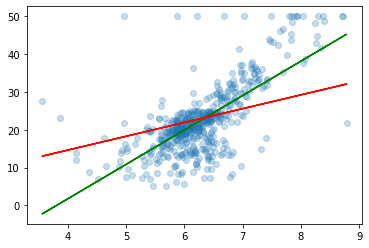

Modelo con fit_intercept: w1 = 9.10210898118031 w0 = -34.67062077643857 mse = 43.60055177116956
Modelo sin fit_intercept: w1 = 3.6533504000238826 w0 = 0.0 mse = 58.41063543210172


In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#rm.reshape(-1, 1) cambia las dimensiones de rm, de tal manera que la segunda dimensión es 1. 
# el -1 indica a Python que recalcule la primera dimensión.
# En resumen, tranforma el vector rm en una matriz de tamaño n*1.

def use_sklearn():
  model = linear_model.LinearRegression().fit(rm.reshape(-1, 1), Y)
  model_2 = linear_model.LinearRegression(fit_intercept=False).fit(rm.reshape(-1, 1), Y)

  yp = model.predict(rm.reshape(-1, 1))
  yp2 =  model_2.predict(rm.reshape(-1, 1))

  plt.plot(rm, yp, color="green")
  plt.plot(rm, yp2, color="red")
  plt.scatter(rm, Y, alpha=0.25)
  plt.show()
  
  fit_intercept_error = mean_squared_error(Y, yp)

  print("Modelo con fit_intercept: w1 =", model.coef_[0], "w0 =",
        model.intercept_, "mse =", fit_intercept_error)
  print("Modelo sin fit_intercept: w1 =", model_2.coef_[0], "w0 =",
        model_2.intercept_, "mse =", mean_squared_error(Y, yp2))
  
use_sklearn()
